Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following questions

Note -

1. Write code comments wherever required for code understanding

Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD

Insights to be drawn -

● Get all the cars and their types that do not qualify for clean alternative fuel vehicle

● Get all TESLA cars with the model year, and model type made in Bothell City.

● Get all the cars that have an electric range of more than 100, and were made after 2015

● Draw plots to show the distribution between city and electric vehicle type


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("ev.csv")
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [3]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                222
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 305
DOL Vehicle ID                                         0
Vehicle Location                                      33
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [4]:
filtered_data = data[data['City'].isnull()]
filtered_data

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
102,1N4AZ0CP1D,NaN,NaN,AP,NaN,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,NaN,112277063,NaN,NaN,NaN
103,5YJ3E1EA5K,NaN,NaN,BC,NaN,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,475254825,NaN,NaN,NaN
127670,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,NaN,143609049,NaN,NaN,NaN


In [5]:
rows = [102, 103, 127670]
selected_rows = data.loc[rows]


In [6]:
selected_rows

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
102,1N4AZ0CP1D,NaN,NaN,AP,NaN,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,NaN,112277063,NaN,NaN,NaN
103,5YJ3E1EA5K,NaN,NaN,BC,NaN,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,475254825,NaN,NaN,NaN
127670,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,NaN,143609049,NaN,NaN,NaN


In [7]:
data = data.drop(index=rows)

In [8]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                222
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 302
DOL Vehicle ID                                         0
Vehicle Location                                      30
Electric Utility                                       0
2020 Census Tract                                      0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130440 entries, 0 to 130442
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         130440 non-null  object 
 1   County                                             130440 non-null  object 
 2   City                                               130440 non-null  object 
 3   State                                              130440 non-null  object 
 4   Postal Code                                        130440 non-null  float64
 5   Model Year                                         130440 non-null  int64  
 6   Make                                               130440 non-null  object 
 7   Model                                              130218 non-null  object 
 8   Electric Vehicle Type                              130440 non-null  object 
 9 

In [10]:
data.dropna(axis=0, inplace= True)

In [11]:
data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [12]:
data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [13]:
replacement = {'Clean Alternative Fuel Vehicle Eligible':"Eligible",
               'Not eligible due to low battery range' : "Not Eligible",
            'Eligibility unknown as battery range has not been researched' : 'Unknown'
               }
data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] = data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].replace(replacement)

In [14]:
filtered_data = data[data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == 'Not Eligible'][['Make', 'Model', 'Electric Vehicle Type']]
filtered_data

,Make,Model,Electric Vehicle Type
6,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV)
7,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV)
8,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
14,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
15,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV)
...,...,...,...
130377,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV)
130385,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV)
130390,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV)
130407,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV)


In [15]:
make = filtered_data['Make'].unique()

In [16]:
for make_value in filtered_data['Make'].unique():
    count = (filtered_data['Make'] == make_value).sum()
    print(make_value, count)


FORD 3350
AUDI 1284
KIA 832
BMW 1705
TOYOTA 3382
JEEP 2321
VOLVO 1513
PORSCHE 463
LINCOLN 207
MERCEDES-BENZ 270
MITSUBISHI 527
HYUNDAI 213
MINI 199
SUBARU 64
LAND ROVER 37
HONDA 9
BENTLEY 3


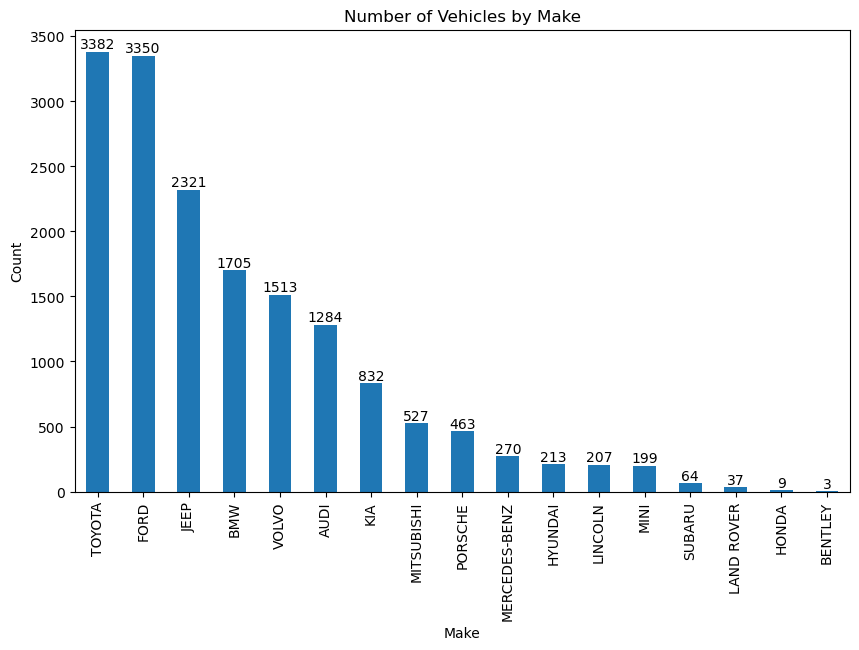

In [17]:
make_counts = filtered_data['Make'].value_counts()

plt.figure(figsize=(10, 6))
ax=make_counts.plot(kind='bar')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Number of Vehicles by Make')

for i, v in enumerate(make_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129889 entries, 0 to 130442
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         129889 non-null  object 
 1   County                                             129889 non-null  object 
 2   City                                               129889 non-null  object 
 3   State                                              129889 non-null  object 
 4   Postal Code                                        129889 non-null  float64
 5   Model Year                                         129889 non-null  int64  
 6   Make                                               129889 non-null  object 
 7   Model                                              129889 non-null  object 
 8   Electric Vehicle Type                              129889 non-null  object 
 9 

In [19]:
# Filter for Tesla cars and Bothell City
tesla_cars_bothell = data[(data['Make'] == 'TESLA') & (data['City'] == 'Bothell')]

# Select the desired columns
tesla_cars_bothell_filtered = tesla_cars_bothell[['Model Year', 'Model']]

# Print the result
print(tesla_cars_bothell_filtered)

        Model Year    Model
39            2020  MODEL 3
217           2022  MODEL 3
218           2022  MODEL Y
222           2018  MODEL 3
292           2017  MODEL X
...            ...      ...
129778        2019  MODEL 3
129954        2021  MODEL 3
129976        2014  MODEL S
130295        2022  MODEL 3
130392        2018  MODEL 3

[2407 rows x 2 columns]


<Figure size 2400x1600 with 0 Axes>

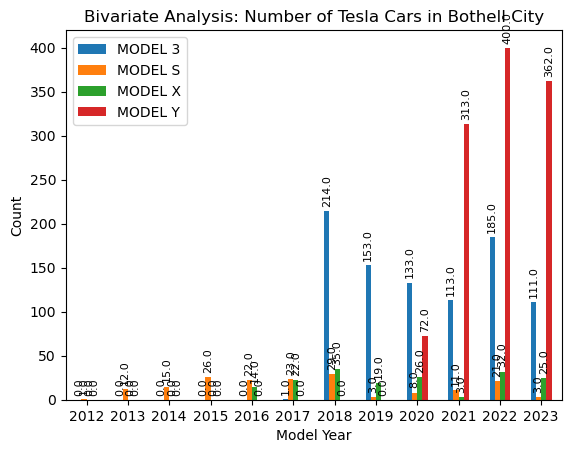

In [21]:
import matplotlib.pyplot as plt

tesla_cars_bothell = data[(data['Make'] == 'TESLA') & (data['City'] == 'Bothell')]
tesla_cars_bothell_filtered = tesla_cars_bothell[['Model Year', 'Model']]

counts = tesla_cars_bothell_filtered.groupby(['Model Year', 'Model']).size().unstack()

plt.figure(figsize=(24,16))
ax=counts.plot(kind='bar', stacked=False)
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.title('Bivariate Analysis: Number of Tesla Cars in Bothell City')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
#plt.tight_layout()

# Add data labels
for i, container in enumerate(ax.containers):
    for j, rect in enumerate(container):
        height = rect.get_height()
        x = rect.get_x() + rect.get_width() / 2
        y = height + 5  # Adjust the offset for label positioning
        plt.text(x, y, height, ha='center', va='bottom', rotation=90, fontsize=8)
plt.show()


In [24]:
electric_cars = data[(data['Electric Range'] > 100) & (data['Model Year'] > 2015)]
electric_cars



,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
12,5YJ3E1EC7L,Thurston,Lacey,WA,98503.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligible,308,0,22.0,2135486,POINT (-122.82324 47.04437),PUGET SOUND ENERGY INC,5.306701e+10
13,5YJ3E1EB2L,Thurston,Olympia,WA,98516.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligible,322,0,22.0,124645363,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130417,5YJYGDEE5L,Pierce,Tacoma,WA,98444.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligible,291,0,29.0,112591538,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130428,1N4AZ1CP0J,Clallam,Sequim,WA,98382.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligible,151,0,24.0,290405174,POINT (-123.09968999999995 48.08137000000005),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
130432,5YJYGDEEXL,King,Vashon,WA,98070.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligible,291,0,34.0,112734723,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
130436,5YJ3E1EB0J,Whatcom,Blaine,WA,98230.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligible,215,0,42.0,103521302,POINT (-122.74888 48.99404),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307301e+10


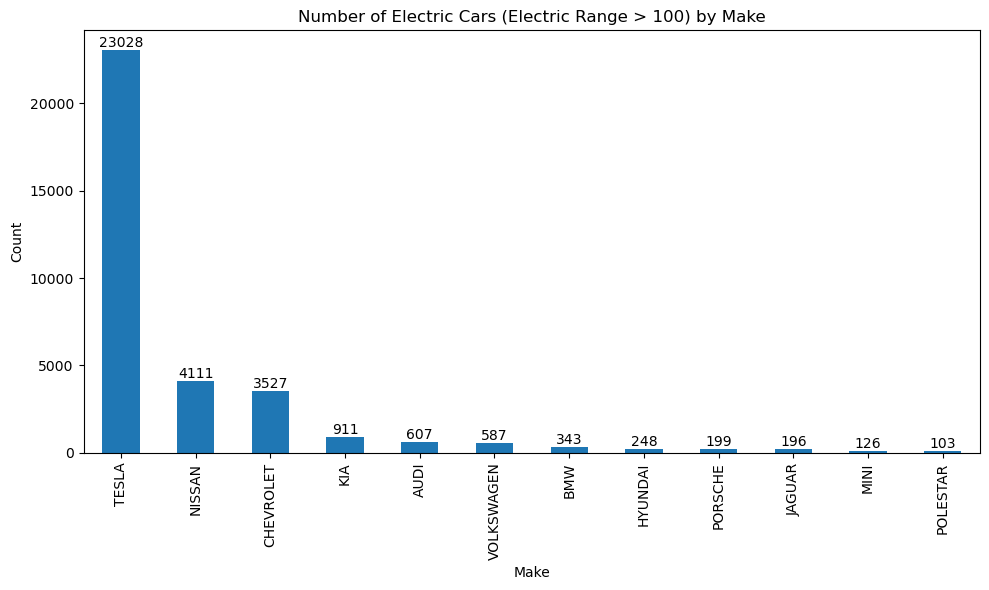

In [26]:

counts = electric_cars['Make'].value_counts()

plt.figure(figsize=(10, 6))
ax = counts.plot(kind='bar')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Number of Electric Cars (Electric Range > 100) by Make')
plt.xticks(rotation=90)
plt.tight_layout()
# Add data labels
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()

<Figure size 1200x600 with 0 Axes>

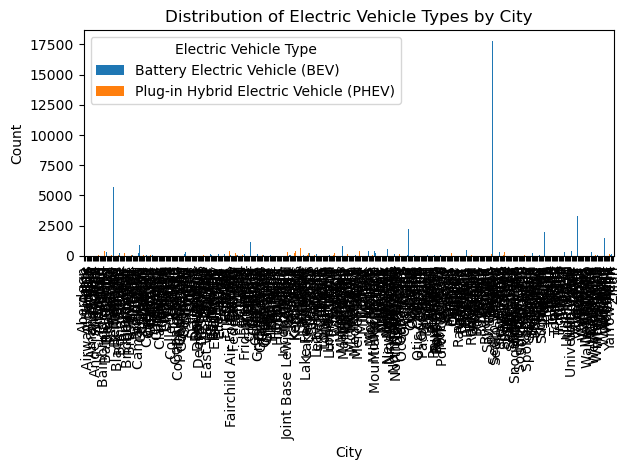

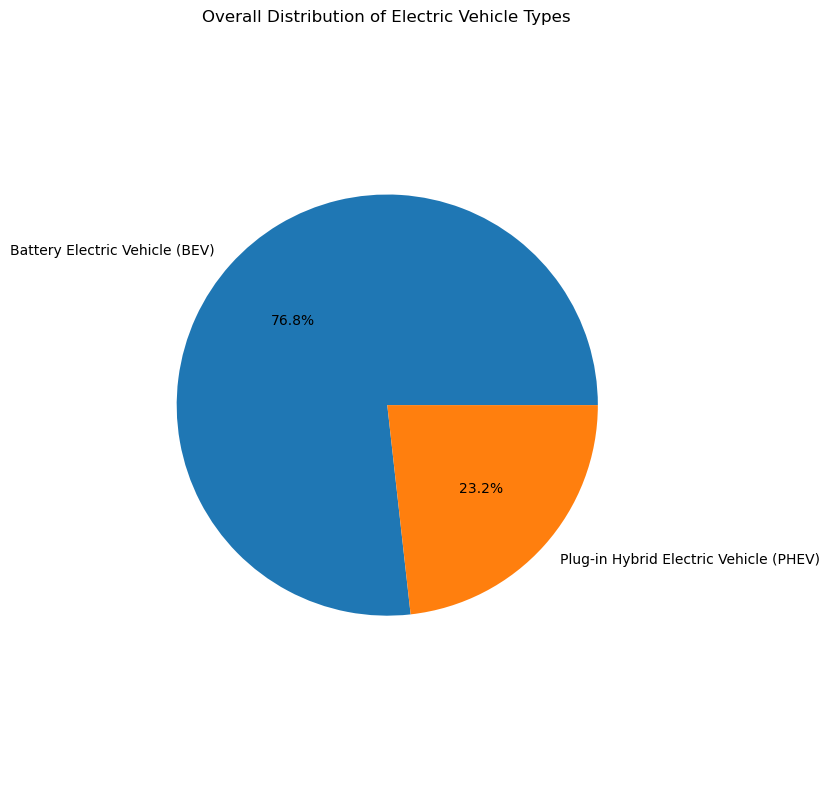

In [33]:
# Group the data by 'City' and 'Electric Vehicle Type' and calculate the counts
city_ev_type_counts = data.groupby(['City', 'Electric Vehicle Type']).size().unstack()

# Bar plot - distribution of electric vehicle types by city
plt.figure(figsize=(12, 6))
city_ev_type_counts.plot(kind='bar', stacked=False)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Types by City')
plt.xticks(rotation=90)
plt.legend(title='Electric Vehicle Type')
plt.tight_layout()
plt.show()

# Pie chart - overall distribution of electric vehicle types
overall_ev_type_counts = data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(overall_ev_type_counts, labels=overall_ev_type_counts.index, autopct='%1.1f%%')
plt.title('Overall Distribution of Electric Vehicle Types')
plt.axis('equal')
plt.tight_layout()
plt.show()

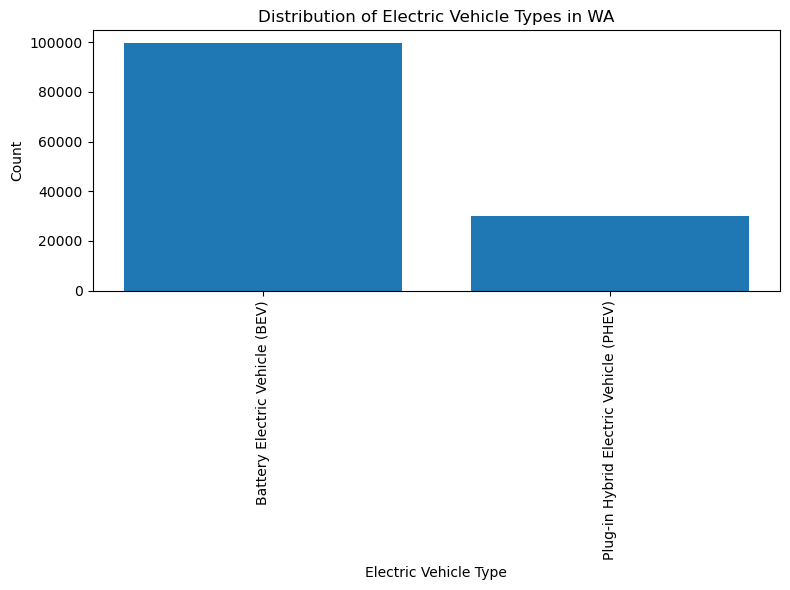

In [31]:
import matplotlib.pyplot as plt

states = data['State'].unique()

for state in states:
    state_data = data[data['State'] == state]
    ev_type_counts = state_data['Electric Vehicle Type'].value_counts()
    
    plt.figure(figsize=(8, 6))
    plt.bar(ev_type_counts.index, ev_type_counts.values)
    plt.xlabel('Electric Vehicle Type')
    plt.ylabel('Count')
    plt.title(f'Distribution of Electric Vehicle Types in {state}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


In [32]:
data['State'].unique()

array(['WA'], dtype=object)